# Решение СЛАУ методом Гаусса

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Невязка
def residual(A, X, F):
    return np.linalg.norm(np.dot(A,X) - F)

In [3]:
# Перестановка строк
# params: mod = {'Gauss', 'Gauss_max'}

def permutation(A, F, index, mod='Gauss'):
    prev_index = index
    
    try:
        if mod == 'Gauss':
            while A[index, prev_index] == 0 and index + 1 != A.shape[0]:
                index += 1
        elif mod == 'Gauss_max':
            index = np.nanargmax(np.where(A != 0, A, np.NaN)[prev_index:, prev_index], axis=0) + prev_index
            
    except ValueError as error:
        pass
    
    if A[index, prev_index] != 0:
        A_i = np.array(A[index, :])
        F_i = np.array(F[index, :])

        A[index, :] = np.array(A[prev_index, :])
        F[index, :] = np.array(F[prev_index, :])

        A[prev_index, :] = A_i
        F[prev_index, :] = F_i

        return A, F, 1
    
    elif prev_index == 0:
        raise ValueError('Система уравнений не имеет решения')
    
    return A, F, 0

In [4]:
# Решение СЛАУ
# params: mod = {'Gauss', 'Gauss_max'}

def solve_SLE(A, F, mod='Gauss'):
    n = A.shape[0]
    A_copy = np.array(A)
    F_copy = np.array(F)
    
    # Приведение к диагональному виду
    for i in range(1, n):
        for j in range(i, n):
            A_copy, F_copy, flag = permutation(A_copy, F_copy, i - 1, mod)

            if flag:
                F_copy[j, 0] = F_copy[j, 0] - (A_copy[j, i - 1] / A_copy[i - 1, i - 1]) * F_copy[i - 1, 0]
                A_copy[j, :] = A_copy[j, :] - (A_copy[j, i - 1] / A_copy[i - 1, i - 1]) * A_copy[i - 1, :]

    #  Метод прогонки
#     print(A_copy[n - 2 : n, :])
#     print()
    
    X = np.zeros((n, 1))
    X[n - 1, 0] = F_copy[n - 1, 0] / A_copy[n - 1, n - 1]   

    for k in range(n - 2, -1, -1):
        amount = 0
        for j in range(k + 1, n):
            amount += X[j, 0] * A_copy[k, j]

        X[k, 0] = (F_copy[k, 0] - amount) / A_copy[k, k]

    return X

## Исходные данные

In [5]:
n = 100

In [6]:
A = np.zeros((n, n))
F = np.zeros(n).reshape((n, 1))

In [7]:
for i in range(n):
    A[i, :] = [random.random() * 10 for _ in range(n)]
    F[i, 0] = random.random() * 10

In [8]:
print('A = ', A, end='\n\n')
print('F = ', F, end='\n\n')

A =  [[3.93664911 1.50775023 6.38650302 ... 3.86405192 9.05333253 4.60597097]
 [7.26946989 7.20071193 9.04539492 ... 3.16743705 0.35372931 2.41462786]
 [1.45621219 6.12445817 1.39080129 ... 0.39587519 4.07744813 4.10803566]
 ...
 [6.36086921 0.59840955 8.05385126 ... 7.24537128 0.42539699 6.67735445]
 [7.87483666 1.3387678  8.99201204 ... 8.24812396 1.07176292 8.33802647]
 [8.27243675 4.29086329 8.04154577 ... 8.82638879 7.87478683 8.97376172]]

F =  [[8.97929966]
 [0.18668135]
 [6.08961802]
 [2.36459328]
 [2.75849367]
 [9.56071533]
 [4.04065256]
 [2.61286276]
 [3.34797027]
 [6.9847779 ]
 [6.36368966]
 [3.41176816]
 [9.72136547]
 [7.01805563]
 [7.86376618]
 [8.83547436]
 [5.74234242]
 [2.19341124]
 [6.17968177]
 [7.14603394]
 [2.44720212]
 [6.45803587]
 [8.17134346]
 [7.97304532]
 [1.26421207]
 [1.00170723]
 [2.92378287]
 [1.59094806]
 [4.21947764]
 [3.68043375]
 [3.74653576]
 [4.15281839]
 [9.22079745]
 [3.59429853]
 [1.32551266]
 [8.09680093]
 [8.00990987]
 [9.54655784]
 [4.91368439]

## Метод Гаусса

In [9]:
try:
    X = solve_SLE(A, F)
except ValueError as value_error:
    print(value_error)

In [10]:
residual(A, X, F)

2.8801318086860344e-11

## Метод Гаусса с выбором главного элемента

In [11]:
try:
    X = solve_SLE(A, F, mod='Gauss_max')
except ValueError as value_error:
    print(value_error)

In [12]:
residual(A, X, F)

8.062519408401377e-13

### Невязка

#### Зависимость от размерности системы

In [13]:
n_plot = []
rdual1_plot = []
rdual2_plot = []

n = 2

while n < 100:
    n_plot.append(n)
    
    A = np.zeros((n, n))
    F = np.zeros(n).reshape((n, 1))

    for i in range(n):
        A[i, :] = [random.random() * 10 for _ in range(n)]
        F[i, 0] = random.random() * 10
        
    X1 = solve_SLE(A, F)
    X2 = solve_SLE(A, F, mod='Gauss_max')
    
    rdual1_plot.append(np.log(residual(A, X1, F)))
    rdual2_plot.append(np.log(residual(A, X2, F)))
    n += 3

<ipython-input-4-4a3d1edc7d9d>:23: RuntimeWarning: divide by zero encountered in double_scalars
  X[n - 1, 0] = F_copy[n - 1, 0] / A_copy[n - 1, n - 1]
<ipython-input-4-4a3d1edc7d9d>:28: RuntimeWarning: invalid value encountered in double_scalars
  amount += X[j, 0] * A_copy[k, j]


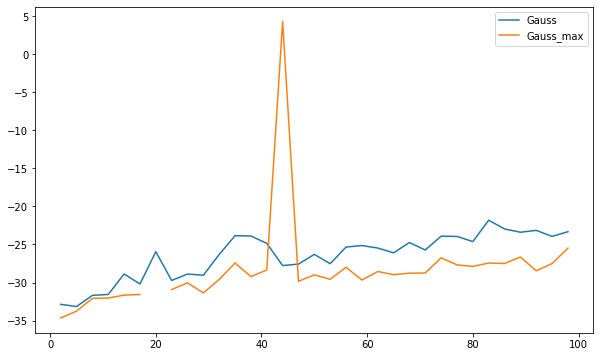

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(n_plot, rdual1_plot, label='Gauss')
plt.plot(n_plot, rdual2_plot, label='Gauss_max')
plt.legend()

#### Зависимость от генерируемых значений

In [17]:
iter_plot = []
iterations = 2

rdual1_plot = []
rdual2_plot = []

n = 100

while iterations < 50:
    iter_plot.append(iterations)
    
    A = np.zeros((n, n))
    F = np.zeros(n).reshape((n, 1))

    for i in range(n):
        A[i, :] = [random.random() * 10 for _ in range(n)]
        F[i, 0] = random.random() * 10
        
    X1 = solve_SLE(A, F)
    X2 = solve_SLE(A, F, mod='Gauss_max')
    
    rdual1_plot.append(np.log(residual(A, X1, F)))
    rdual2_plot.append(np.log(residual(A, X2, F)))
    iterations += 1

<ipython-input-4-4a3d1edc7d9d>:23: RuntimeWarning: invalid value encountered in double_scalars
  X[n - 1, 0] = F_copy[n - 1, 0] / A_copy[n - 1, n - 1]


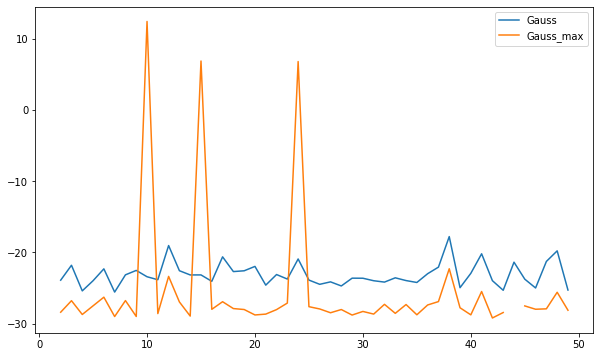

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(iter_plot, rdual1_plot, label='Gauss')
plt.plot(iter_plot, rdual2_plot, label='Gauss_max')
plt.legend()